## データの読み込み

In [23]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
# CSVデータの読み込み
df = pd.read_csv('housing.csv')

In [8]:
df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


## 分布の確認

In [10]:
import seaborn as sns


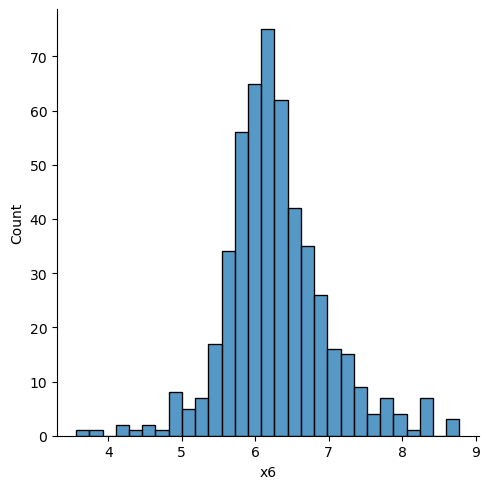

In [27]:
sns.displot(df['x6'])
plt.show()

## 外れ値除去(3σ法)

In [30]:
col = 'x6'

In [32]:
# 平均
mean = df.mean()
mean

x1       3.613524
x2      11.363636
x3      11.136779
x4       0.069170
x5       0.554695
x6       6.284634
x7      68.574901
x8       3.795043
x9       9.549407
x10    408.237154
x11     18.455534
x12    356.674032
x13     12.653063
y       22.532806
dtype: float64

In [36]:
mean[col]

6.284634387351779

In [40]:
# 標準偏差(standard deviation)
sigma = df.std()
sigma

x1       8.601545
x2      23.322453
x3       6.860353
x4       0.253994
x5       0.115878
x6       0.702617
x7      28.148861
x8       2.105710
x9       8.707259
x10    168.537116
x11      2.164946
x12     91.294864
x13      7.141062
y        9.197104
dtype: float64

In [42]:
sigma[col]

0.7026171434153237

In [44]:
# まずは平均から3σ離れた最も値が低い場所場所を格納
low = mean[col] -3*sigma[col]
low

4.176782957105807

In [46]:
# 平均から3σ離れた最も値が高い場所を格納
high = mean[col] +3*sigma[col]
high

8.39248581759775

In [48]:
df

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [58]:
# lowよりも値が大きくかつhighよりも値が小さい表だけを取得
# これで3σ法完了
df2 = df[(df[col] > low) & (df[col] < high)]

In [54]:
len(df)

506

In [60]:
len(df2) #外れ値を除外できてる

498

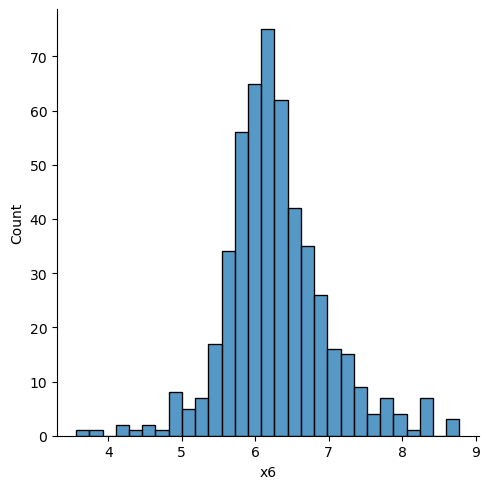

In [66]:
# 分布確認(orginal)
sns.displot(df['x6'])
plt.show()

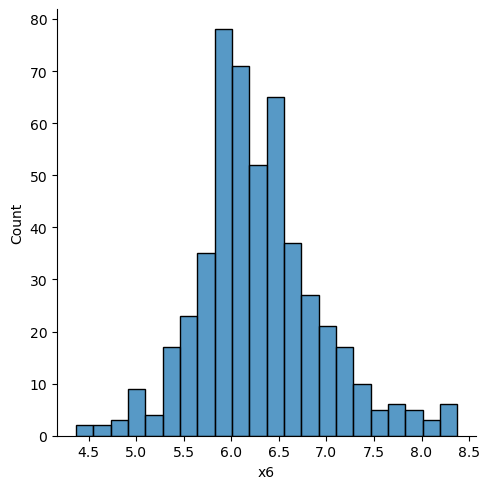

In [68]:
# 分布確認(3σ法)
sns.displot(df2['x6'])
plt.show()

In [70]:
# すべてのカラムに適応させる
cols = df.columns
cols

Index(['x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9', 'x10', 'x11',
       'x12', 'x13', 'y'],
      dtype='object')

In [84]:
_df = df
for col in cols:
    # print(col)
    # 3σ法の上下限値を設定
    low = mean[col] -3*sigma[col]
    high = mean[col]+3*sigma[col]
    # 条件で絞込
    _df = _df[(_df[col] > low) & (_df[col] < high)]

In [86]:
# オリジナル
len(df)

506

In [88]:
# 3σ法適用後
len(_df)

415

## 数が極端に絞られるのを防ぐためには
- 外れ値は取り除く
- 外れ値を平均もしくは中央値などで埋める
- 主成分分析を使って、潜在変数で変換した後に3σ法を適用

## 入力変数と出力変数に分割

In [94]:
_df.head(3)

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,y
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7


In [109]:
# df.iloc[行・列]
X = _df.iloc[:, :-1] #すべての行かつy列以外をすべて取得
y = _df.iloc[:,-1] #すべての行かつy列だけを取得

## 訓練データと検証データに分割

In [111]:
from sklearn.model_selection import train_test_split

In [113]:
# random_state=1 にすることで、データを分割する際に常に同じ方法でデータが分割されます。これにより、モデルを再度実行したときに結果が安定して得られるようになる
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.4,random_state=1) 

## 重回帰分析

In [116]:
from sklearn.linear_model import LinearRegression

In [120]:
# モデルを宣言
model = LinearRegression()

In [122]:
# モデルの学習
model.fit(X_train,y_train)

LinearRegression()

In [126]:
# 検証←訓練データ
model.score(X_train,y_train) 
#外れ値除去を行ったことでhousing.csvの以前の結果(0.74..)よりも高い評価となっている

0.7972109224535134